**Titanic Dataset**

**Source:** [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/)

The sinking of the Titanic is one of the most infamous shipwrecks in history,  resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

The Titanic Dataset contains information of passengers with labels. The task is to use this data set to build a model to predict whether a passenger is likely to survive or not.

This notebook focuses on data processing, data preprocessing and data exploration to prepare data for building predictive models.

# 1.Overview

The data has been split into two groups is included in the project or can be found at [Kaggle](https://www.kaggle.com/competitions/titanic/data) :

- **The training set** (train.csv): The labeled data set is used to build predictive models. Later it will be divided into training set and validation set.
- **The test set** (test.csv): The unlabeled dataset is used to see how well the model performs on unseen data.

## Data Dictionary

| Variable   | Definition                                 | Key                                 |
|------------|-------------------------------------------|-------------------------------------|
| survival   | Survival                                  | 0 = No, 1 = Yes                    |
| pclass     | Ticket class                              | 1 = 1st, 2 = 2nd, 3 = 3rd          |
| sex        | Sex                                       |                                     |
| Age        | Age in years                              |                                     |
| sibsp      | # of siblings / spouses aboard the Titanic |                                     |
| parch      | # of parents / children aboard the Titanic |                                     |
| ticket     | Ticket number                             |                                     |
| fare       | Passenger fare                            |                                     |
| cabin      | Cabin number                              |                                     |
| embarked   | Port of Embarkation                       | C = Cherbourg, Q = Queenstown, S = Southampton |


# 2.Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 3.Load and Inspect the Data

Load the data to understand its structure and identify issues that need to be addressed in data processing and preprocessing.

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Final Exam ML/datasets/titanic/train.csv", index_col='PassengerId')
test_df = pd.read_csv("/content/drive/MyDrive/Final Exam ML/datasets/titanic/test.csv", index_col='PassengerId')

## 3.1 The train set

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> **Comment:** The training dataset contains 819 rows and 11 columns (10 attribute variables and 1 label variable Survived). The dataset contains a combination of numeric (e.g. `Age`), categorical (e.g. `Sex`), string (e.g. `Name`) and missing features.
---





## 3.2 The test set

In [ ]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [ ]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


> **Remarks:** The test dataset has the same structure as the training set but without the `Survived` label variable.


---



# 4 .Data Processing

## 4.1 Data Cleaning

Check for and handle missing values, duplicates, and outliers.

### 4.1.1 Check for Missing Values and Duplicate Rows

In [ ]:
# Check duplicste rows
print(f"Number of duplicate rows in train set: {train_df.duplicated().sum()}")
print(f"Number of duplicate rows in test set: {test_df.duplicated().sum()}")

Number of duplicate rows in train set: 0
Number of duplicate rows in test set: 0


In [ ]:
# Checking missing values in both dataframes
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

# Combine the missing values from both dataframes
missing_values_df = pd.DataFrame({
    'Train Missing': train_missing,
    'Test Missing': test_missing
}).rename_axis('Features')

# Calculate the total missing values for both datasets
missing_values_df['Total Missing'] = missing_values_df['Train Missing'] + missing_values_df['Test Missing']

# Remove rows where both Train and Test columns have no missing values
missing_values_df = missing_values_df[missing_values_df['Total Missing'] > 0]

# Display the result
missing_values_df

,Train Missing,Test Missing,Total Missing
Features,,,
Age,177,86.0,263.0
Cabin,687,327.0,1014.0
Embarked,2,0.0,2.0
Fare,0,1.0,1.0


In [ ]:
# function to evaluate missing data
def EvaluateMissingData(df: pd.DataFrame) -> None:
  """
  Evaluate missing data on DataFrames.

  Parameters:
  ----------
    df (pd.DataFrame): The DataFrame.

  Returns:
  ----------
    None: Percentage of missing value of columns of DataFrame.
  """

  rows, cols = df.shape
  columns = df.columns

  for column in columns:

    if df[column].isnull().sum() > 0:

      missingData = ((df[column].isnull().sum()/rows) * 100)
      print(f"Column '{column}': {missingData:.2f}% Missing Data")

In [ ]:
EvaluateMissingData(train_df)

Column 'Age': 19.87% Missing Data
Column 'Cabin': 77.10% Missing Data
Column 'Embarked': 0.22% Missing Data


In [ ]:
EvaluateMissingData(test_df)

Column 'Age': 20.57% Missing Data
Column 'Fare': 0.24% Missing Data
Column 'Cabin': 78.23% Missing Data


> **Comments:** Both training and testing have no duplicate rows because of a lot of missing values. In both files, the `Cabin` column has the most missing values ​​(>75% of the corresponding data of the file) followed by the `Age` column with missing values ​​accounting for about 20%.
---



### 4.1.2 Filling Missing Values

In [ ]:
train_df.groupby(['Sex','Pclass']).median(numeric_only=True)['Age']

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
# Fill the missing values in 'Age' with the median value after grouping between Sex and Pclass
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Fill missing 'Embarked' values with the most common port
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Fill missng `Fare` values with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [ ]:
# Drop the 'Cabin' column (too many missing values)
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

## 4.2 Data Transformation

Reformat or structure data. Because the categorical features and string features in the training set and test set are stored as `Object` or `int`, it is necessary to convert them to the correct data type.

Specifically:
- **Categorical features:** `Pclass`, `Sex`, and `Embarked`.

In [ ]:
categorical_features = ["Pclass", "Sex", "Embarked"]

# Function convert to Category dtype
def Convert2Category(df: pd.DataFrame, features: list) -> pd.DataFrame:
  """
  Converts the data type of the columns specified in DataFrame to data type category.

  Parameters:
  ----------
    df (pd.DataFrame): The DataFrame.
    features (list): List of columns to convert.

  Returns:
  ----------
    pd.DataFrame: DataFrame with converted columns.
  """
  for feature in features:
    df[feature] = df[feature].astype('category')

  return df

In [ ]:
train_df = Convert2Category(train_df, categorical_features)
test_df = Convert2Category(test_df, categorical_features)

## 4.3 Feature Engineering

***Family Size***

Columns `SibSp` and `Parch` refer to the number of family members traveling with the passenger.

So create a new column: `FamilySize` = `SibSp` + `Parch` + 1.

In [ ]:
# Create a new column for family size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1 # plus 1 because it includes current passengers.
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

***Titles***

The `Name` column is currently not being used, but can be extracted the title from the name.

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [ ]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3


In [ ]:
# Extract the title from the name
import re
def ExtractTitleName(name):
  p = re.compile(r",([\w\s]+)\.")
  return p.search(name).groups(1)[0].strip()

In [ ]:
train_df['Title_Name'] = train_df['Name'].apply(lambda name: ExtractTitleName(name))
test_df['Title_Name'] = test_df['Name'].apply(lambda name: ExtractTitleName(name))

In [ ]:
train_df['Title_Name'].value_counts()

,count
Title_Name,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [ ]:
test_df['Title_Name'].value_counts()

,count
Title_Name,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


**Notes:** There are quite a few titles going around, but can reduce them all to Mrs, Miss, Mr, Master and Other.

In [ ]:
title_list = ['Mr','Miss','Mrs','Master']

def GroupTitle(title):
  if title in title_list:
    return title
  elif title == "Ms":
    return "Miss"
  else:
    return "Others"

In [ ]:
train_df['Title_Name'] = train_df['Title_Name'].apply(lambda title: GroupTitle(title))
test_df['Title_Name'] = test_df['Title_Name'].apply(lambda title: GroupTitle(title))

In [ ]:
train_df['Title_Name'].value_counts()

,count
Title_Name,
Mr,517
Miss,183
Mrs,125
Master,40
Others,26


In [ ]:
test_df['Title_Name'].value_counts()

,count
Title_Name,
Mr,240
Miss,79
Mrs,72
Master,21
Others,6


In [ ]:
train_df = Convert2Category(train_df, ['Title_Name'])
test_df = Convert2Category(test_df, ['Title_Name'])

# 5.Exploratory Data Analysis (EDA)

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("bright")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    category
 2   Name        891 non-null    object  
 3   Sex         891 non-null    category
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Ticket      891 non-null    object  
 8   Fare        891 non-null    float64 
 9   Embarked    891 non-null    category
 10  FamilySize  891 non-null    int64   
 11  Title_Name  891 non-null    category
dtypes: category(4), float64(2), int64(4), object(2)
memory usage: 66.7+ KB


In [ ]:
categorical_features = ["Pclass", "Sex", "Embarked", "Title_Name"]
numerical_features = ["Age", "Fare", "FamilySize"]

## 5.1 Numerical Features

### 5.1.1Summary Statistics

In [ ]:
train_df[numerical_features].describe()

,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000
mean,29.112424,32.204208,1.904602
std,13.304424,49.693429,1.613459
min,0.420000,0.000000,1.000000
25%,21.500000,7.910400,1.000000
50%,26.000000,14.454200,1.000000
75%,36.000000,31.000000,2.000000
max,80.000000,512.329200,11.000000


### 5.1.2Distribution Plots

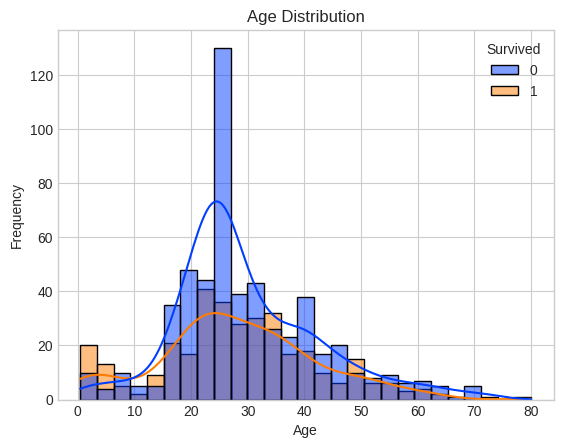

In [ ]:
# Distribution of 'Age'
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

> **Remarks:**
- The majority of passengers fall in the 20-30 age range and The peak age group appears to be around 25 years.
- Passengers who did not survive (blue bars) dominate across most age groups, especially around the peak (20-30 years).
- Survivors (orange bars) are visible in all age ranges but are notably fewer compared to non-survivors.
- There is a significant proportion of young survivors compared to non-survivors, suggesting higher survival rates for children.
- The distribution is slightly right-skewed, with a tail extending toward older ages.

---

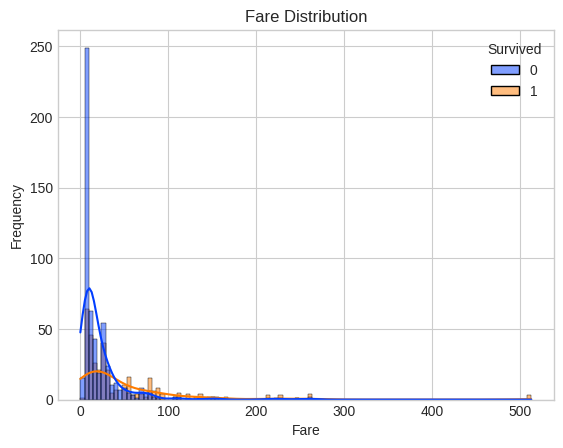

In [ ]:
# Distribution of 'Fare'
sns.histplot(data=train_df, x='Fare', hue='Survived', kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

> **Remarks:**
- Data is heavily concentrated in the 0-50 range.
- The distribution is right-skewed, with a tail extending toward highẻ fares.

---

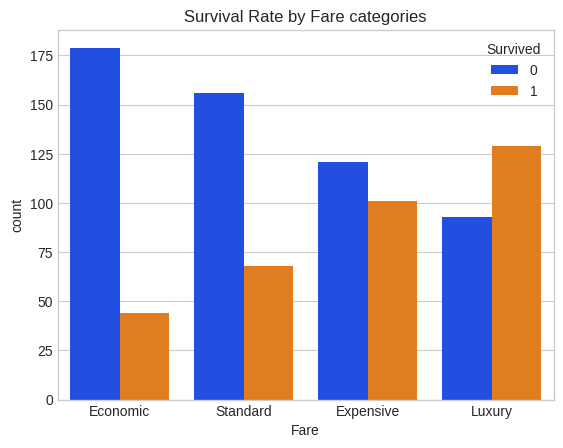

In [ ]:
# Divide ticket prices into 4 categories
ticket_type = ["Economic", "Standard", "Expensive", "Luxury"]
quartile_fare = pd.qcut(train_df['Fare'], 4, labels=ticket_type)
sns.countplot(data = train_df, x = quartile_fare, hue = "Survived")
plt.title("Survival Rate by Fare categories")
plt.show()

> **Remarks:** The passengers with high fares have a higher survival rate.

---

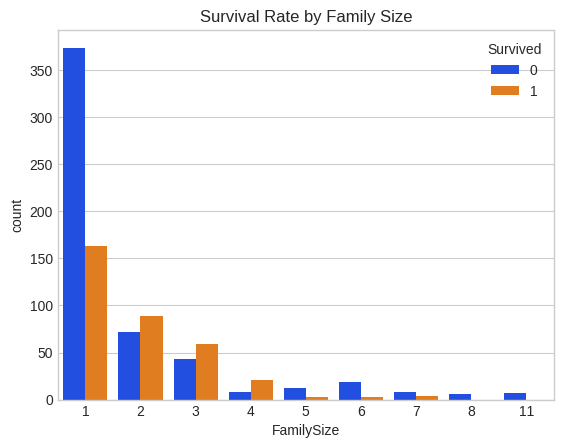

In [ ]:
# Distribution of 'Family Size'
sns.countplot(data=train_df, x='FamilySize', hue='Survived')
plt.title("Survival Rate by Family Size")
plt.show()

**Remarks:**
- The majority of single passengers (FamilySize = 1) did not survive, indicating a low survival rate for individuals traveling alone.
- Passengers with small family sizes (2–3) show a higher proportion of survivors compared to those with FamilySize = 1. These family sizes appear to have a higher survival rate, possibly due to better assistance and support during the evacuation.
- As FamilySize increases beyond 4, the survival rate decreases significantly.

---

**Summary:** Features `Age`, `Fare` and `FamilySize` have a significant influence on survival rate.

### 5.1.3 Outlier Detection

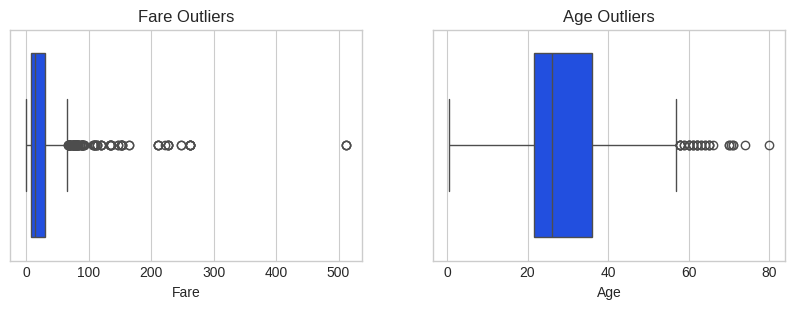

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# Boxplot for 'Fare' to detect outliers
sns.boxplot(data=train_df, x='Fare', ax=axes[0])
axes[0].set_title("Fare Outliers")

# Boxplot for 'Age' to detect outliers
sns.boxplot(data=train_df, x='Age', ax=axes[1])
axes[1].set_title("Age Outliers")

plt.show()

In [ ]:
train_df.loc[train_df['Fare'] >= np.max(train_df['Fare'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title_Name
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,2,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1,Mr


> **Remarks:** There are many outlier data points in both features and this is concentrated on the right side. But from previous analysis charts, they are probably valid outlier data points.

## 5.2 Categorical Features

### 5.2.1 Frequency Counts

In [ ]:
train_df.describe(include='category')

,Pclass,Sex,Embarked,Title_Name
count,891,891,891,891
unique,3,2,3,5
top,3,male,S,Mr
freq,491,577,646,517


In [ ]:
# Count of unique values in categorical features
print(train_df['Pclass'].value_counts())
print('\n')
print(train_df['Sex'].value_counts())
print('\n')
print(train_df['Embarked'].value_counts())
print('\n')
print(train_df['Title_Name'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


Title_Name
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64


### 5.2.2 Count Plots

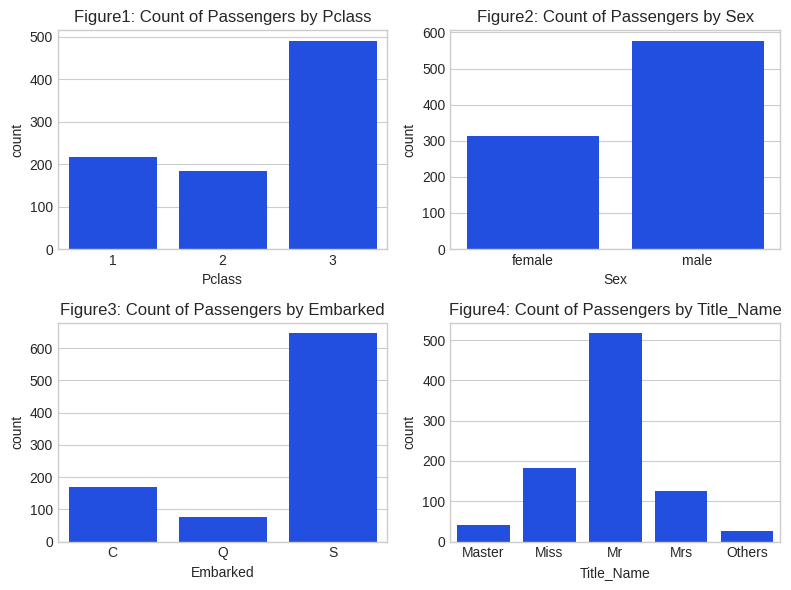

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for idx, feature in enumerate(categorical_features):

  row = idx // 2 # divide ncols=2
  col = idx % 2  # divide ncols=2
  ax = axes[row, col]

  sns.countplot(data=train_df, x=feature, ax=ax)

  ax.set_title(f'Figure{idx+1}: Count of Passengers by {feature}')

plt.tight_layout()
plt.show()

### 5.2.3 Target-Based Analysis

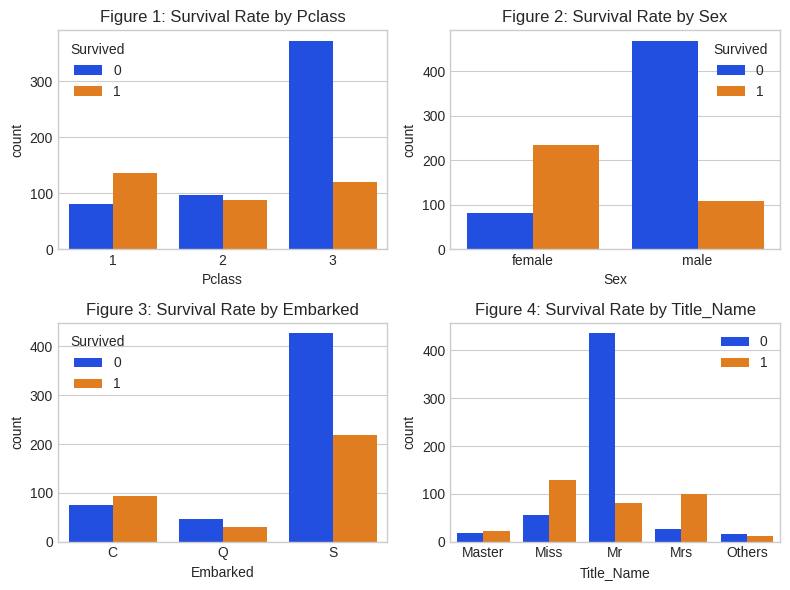

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for idx, feature in enumerate(categorical_features):

  row = idx // 2 # divide ncols=2
  col = idx % 2  # divide ncols=2
  ax = axes[row, col]

  sns.countplot(data=train_df, x=feature, hue="Survived", ax=ax)

  ax.set_title(f'Figure {idx+1}: Survival Rate by {feature}')

plt.tight_layout()
plt.legend()
plt.show()

**Remarks:**

**Figure 1: Survival Rate by Pclass**
- **1st class** passengers have the highest survival rate (more orange bars).
- **3rd class** passengers experienced the highest mortality (blue bars dominate), indicating a strong relationship between class and survival.

**Figure 2: Survival Rate by Sex**
- **Females** had significantly higher survival rates compared to males (orange bars dominate for females).
- **Males** had a much higher mortality rate, suggesting gender played a major role in survival.

**Figure 3: Survival Rate by Embarked**
- Passengers embarking at **'C' (Cherbourg)** had a better survival rate.
- Those from **'S' (Southampton)** faced the highest mortality (blue bars dominate)

**Figure 4: Survival Rate by Title_Name**
- Titles like **'Miss'** and **'Mrs'** have a higher proportion of survivors, indicating women generally fared better.
- **'Mr'** has the highest mortality (overwhelming blue bars).
- **'Master'** shows a relatively high survival rate.

---
**Summary:** Survival was influenced by socio-demographic factors such as class, gender, embarkation port, and title. These features are likely strong predictors in the classification model.


## 5.3 Target Variable

In [ ]:
train_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


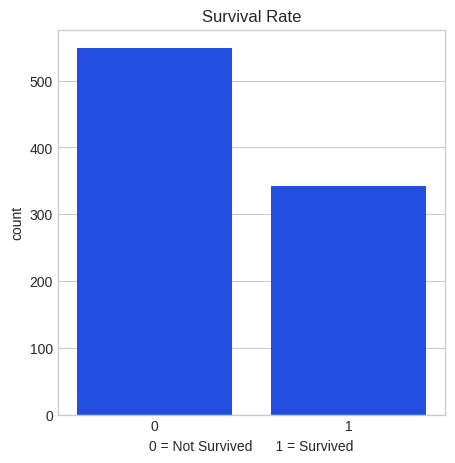

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Rate')
plt.xlabel('0 = Not Survived      1 = Survived')
plt.show()

**Remarks:** This is **unbalance** Classification Problem as the difference in quantity between #0 and #1 is relatively large.

# 6.Data Preprocessing

## 6.1 Feature Selection

In [ ]:
print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['Age', 'Fare', 'FamilySize']
Categorical Features: ['Pclass', 'Sex', 'Embarked', 'Title_Name']


In [ ]:
features = numerical_features + categorical_features
print(f"All Features: {features}")

All Features: ['Age', 'Fare', 'FamilySize', 'Pclass', 'Sex', 'Embarked', 'Title_Name']


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    category
 2   Name        891 non-null    object  
 3   Sex         891 non-null    category
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Ticket      891 non-null    object  
 8   Fare        891 non-null    float64 
 9   Embarked    891 non-null    category
 10  FamilySize  891 non-null    int64   
 11  Title_Name  891 non-null    category
dtypes: category(4), float64(2), int64(4), object(2)
memory usage: 66.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    category
 1   Name        418 non-null    object  
 2   Sex         418 non-null    category
 3   Age         418 non-null    float64 
 4   SibSp       418 non-null    int64   
 5   Parch       418 non-null    int64   
 6   Ticket      418 non-null    object  
 7   Fare        418 non-null    float64 
 8   Embarked    418 non-null    category
 9   FamilySize  418 non-null    int64   
 10  Title_Name  418 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 28.3+ KB


## 6.2 Data Partitioning

This is **unbalance** Classification Problem as the difference in quantity between #0 and #1 is relatively large. So, use **Stratified Train-Test Split** to ensures that the proportion of classes in the split is consistent with the original dataset.

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df[features]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
print("Training set class distribution:")
print(y_train.value_counts())

print("Validation set class distribution:")
print(y_val.value_counts())

Training set class distribution:
Survived
0    439
1    273
Name: count, dtype: int64
Validation set class distribution:
Survived
0    110
1     69
Name: count, dtype: int64


In [ ]:
# # Save the dataset to files

# train_dataset = pd.concat([X_train, y_train], axis=1)
# val_dataset = pd.concat([X_val, y_val], axis=1)
# test_dataset = test_df[features]

# train_dataset.to_csv('/content/drive/MyDrive/Final Exam ML/datasets/cleaned-data/data_v2/train.csv', index=True)
# val_dataset.to_csv('/content/drive/MyDrive/Final Exam ML/datasets/cleaned-data/data_v2/val.csv', index=True)
# test_dataset.to_csv('/content/drive/MyDrive/Final Exam ML/datasets/cleaned-data/data_v2/test.csv', index=True)